# Introduction

This notebook was used to predict the matches of the English Premier League (EPL) for matchweek 20. The data was provided in a .csv file from the 2000/01 to 2022/23 seasons [1]. Additional data were added as extra features from external sources [2,3]. These included statistics like home and away possession %, home and away win rate % and home and away rating. Other features were engineered through the use of specific formulae for the home and away attacking and defencive strength. 

The next section discusses about data imported into a pandas data frame and the concept of differential was introduced. Next, there was data transformation and exploration where the rolling averages for the given fetaures were found for different number of games. 

In the methodology section, different models were implemented from scikit learn and then they were trained using the grid search algorithm to give the best accuracy.

Finally, the results were shown for the future matches using the best model and the relative feature importance was shown.

[1] England Football Results Betting Odds | Premiership Results & Betting Odds [Internet]. Football-data.co.uk. 2022 [cited 2023 Jan 3]. Available from: https://www.football-data.co.uk/englandm.php

[2] Premier League Team Statistics | WhoScored.com [Internet]. Whoscored.com. 2023 [cited 2023 Jan 3]. Available from: https://www.whoscored.com/Regions/252/Tournaments/2/Seasons/1849/Stages/3115/TeamStatistics/England-Premier-League-2009-2010

[3] Simulating a Football Season [Internet]. IB Maths Resources from Intermathematics. IB Maths Resources from Intermathematics; 2019 [cited 2023 Jan 3]. Available from: https://ibmathsresources.com/simulating-a-football-season/

# Data Import

In this section different python libraries have been imported that are needed to start investigating the data. For instance, Pandas and Numpy were imported as well as some other functions such as train_test_split and accuracy_score from Scikit learn. The train and test data have been loaded using the .csv format. Using the describe function, some important statistical parameters were found such as the mean and standard deviation of the dataset for each fetaure.

In [1]:
# loading different python libraries and key metrics from scikit learn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from os import access
import shutil
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# loading different machine learning algorithms from scikit learn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier,MLPRegressor

In [2]:
# loading training and test datset
data_train = pd.read_csv("epl_train_final.csv")
data_test = pd.read_csv("epl_test_final.csv")

In [3]:
# describing key statistical parameters for each feature
data_train.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,...,Arating,HomeMatchupWinRate,AwayMatchupWinRate,HomeTeamHomeWinrate,AwayTeamAwayWinrate,HomePreviousMatchupResult,HomeAttackingStrength,HomeDefensiveStrength,AwayAttackingStrength,AwayDefensiveStrength
count,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,8486.000000,...,5066.000000,8486.000000,8486.000000,8487.000000,8487.000000,8486.000000,8487.000000,8487.000000,8487.000000,8487.000000
mean,1.523922,1.154961,0.683125,0.507424,13.516498,10.666863,6.090502,4.749941,6.074358,4.778341,...,6.735904,0.352867,0.362514,0.459965,0.279575,0.462703,0.961008,0.980424,0.733708,1.279707
std,1.304660,1.142897,0.834362,0.723788,5.270113,4.598752,3.317540,2.783006,3.094963,2.738194,...,0.154347,0.150114,0.151188,0.135767,0.121422,0.411523,0.236319,0.185241,0.175193,0.227830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.240000,0.043478,0.041667,0.090909,0.041667,0.000000,0.479485,0.573626,0.396516,0.576807
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,...,6.630000,0.250000,0.250000,0.363636,0.198380,0.000000,0.792123,0.863653,0.607396,1.091955
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,...,6.720000,0.333333,0.333333,0.427273,0.250000,0.500000,0.904006,0.997947,0.687938,1.332542
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,...,6.830000,0.454545,0.500000,0.553360,0.333333,1.000000,1.104139,1.098782,0.836260,1.442390
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,20.000000,19.000000,...,7.130000,0.866667,0.875000,0.800000,0.625000,1.000000,1.560087,1.559351,1.225289,2.061906


# Data Transformation & Exploration

Next, the Date data was converted into a pandas datetime object and the the some of the empty cells from the external features have been turned into the means. In addition, the differences for each features were investigated for a certain past number of games.

Lastly, the correlation matrix for each differential feature as well as the box plots for the features that have been added through the use of external sources or formuale have been generated.

In [4]:
# converting date column to pandas datetime opbjects
data_train["Date"] = pd.to_datetime(data_train["Date"],dayfirst=True)
data_test["Date"] = pd.to_datetime(data_test["Date"],dayfirst=True)

In [5]:
# creating mean values to fill the empty cells
data_train=data_train.fillna({"Hrating":data_train["Hrating"].mean(),"Arating":data_train["Arating"].mean(),"HPoss%":data_train["HPoss%"].mean(),"APoss%":data_train["APoss%"].mean(),"Hpass%":data_train["Hpass%"].mean(),"Apass%":data_train["Apass%"].mean()})

In [6]:
# Define function to compute a rolling average of difference between selected numeric features 
# for past n matches of both teams in each matchup
def get_rolling_average(data,team,n,date):
    features = ["FTHG","FTAG","HTHG","HTAG","HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR","HPoss%","APoss%","Hpass%","Apass%"]
    numerics = ['int16', 'int32', 'int64']
    team_matches = data[((data["HomeTeam"]==team) | (data["AwayTeam"]==team)) & (data["Date"]<date)]
    if len(team_matches)<n:
        return pd.DataFrame()
    else:
        n_matches = team_matches.iloc[-n:,:]
        match_data = []
        for i in range(n):
            dt = []
            for f in range(0,len(features),2):
                dt.append(n_matches.iloc[i][features[f]]-n_matches.iloc[i][features[f+1]])
            if n_matches.iloc[i]["AwayTeam"] == team:
                dt = [-1*x for x in dt]
            match_data.append(dt)
        match_data = pd.DataFrame(match_data)
        means = pd.DataFrame(match_data.mean(axis=0)).T
        return means

In [7]:
#Define function to computer differences of all extra non rolling average features for both teams
def get_extra_features(data,index):
    instance = data.iloc[index]
    ext_features = ["HomeTeamElo","AwayTeamElo","Hrating","Arating","HomeAttackingStrength","AwayAttackingStrength","HomeDefensiveStrength","AwayDefensiveStrength","HomeMatchupWinRate","AwayMatchupWinRate","HomeTeamHomeWinrate","AwayTeamAwayWinrate"]
    extra_f = []
    for f in range(0,len(ext_features),2):
        extra_f.append(data.iloc[index][ext_features[f]]-data.iloc[index][ext_features[f+1]])
    return pd.DataFrame(extra_f).T

In [8]:
# Copying training csv file to create a editable copy of the data for
# visulisation purposes
shutil.copyfile("epl_train_final.csv","Visual.csv")

'Visual.csv'

In [9]:
# Reading the new csv file
visual = pd.read_csv("Visual.csv")

In [10]:
# Substituting NAN of each column values with the mean value
list1 = list(visual)
for i in range(10,23):
    x = visual[list1[i]].mean()
    visual[list1[i]].fillna(x,inplace=True)

In [11]:
# Checking for NAN values for each feature
print(visual.isnull().sum())

Date                            1
HomeTeam                        1
AwayTeam                        1
FTHG                            1
FTAG                            1
FTR                             1
HTHG                            1
HTAG                            1
HTR                             1
Referee                         1
HS                              0
AS                              0
HST                             0
AST                             0
HC                              0
AC                              0
HF                              0
AF                              0
HY                              0
AY                              0
HR                              0
AR                              0
HomeTeamElo                     0
AwayTeamElo                     0
HPoss%                       3421
APoss%                       3421
Hpass%                       3421
Apass%                       3421
Hrating                      3421
Arating       

In [12]:
# Calculating the difference between each additional feature added to the 
# training data
visual["DefensiveStrength_Diff"]= visual["HomeDefensiveStrength"]- visual["AwayDefensiveStrength"]
visual["AttackingStrength_Diff"]= visual["HomeAttackingStrength"]- visual["AwayAttackingStrength"]
visual["Rating_Diff"]= visual["Hrating"]- visual["Arating"]
visual["Pass%_Diff"]= visual["Hpass%"]- visual["Apass%"]
visual["Poss%_Diff"]= visual["HPoss%"]- visual["APoss%"]
visual["Elo_Diff"] = visual["HomeTeamElo"] - visual["AwayTeamElo"]
visual["Rating_Diff"] = visual["Hrating"] -visual["Arating"]
visual["MatchupWinRate_Diff"] = visual["HomeMatchupWinRate"] - visual["AwayMatchupWinRate"]
visual["TeamWinrate"] = visual["HomeTeamHomeWinrate"] -visual["AwayTeamAwayWinrate"]

In [13]:
# Calculating the difference between each original feature given in the training 
# data
visual["FTHG_Diff"] = visual["FTHG"]-visual["FTAG"]
visual["HTHG_Diff"] = visual["HTHG"] -visual["HTAG"]
visual["HS_Diff"] = visual["HS"] - visual["AS"]
visual["HST_Diff"] = visual["HST"] -visual["AST"]
visual["HF_Diff"] = visual["HF"] -visual["AF"]
visual["HC_Diff"] = visual["HC"] -visual["AC"]
visual["HY_Diff"] = visual["HY"] -visual["AY"]
visual["HR_Diff"] = visual["HR"] -visual["AR"]

In [14]:
# Finding the moving averages of original training data
n= 10
visual["MAFTHG_diff"] = visual["FTHG_Diff"].rolling(n).mean()
visual["MAHTHG_Diff"] = visual["HTHG_Diff"].rolling(n).mean()
visual["MAHS_Diff"] = visual["HS_Diff"].rolling(n).mean()
visual["MAHST_Diff"] = visual["HST_Diff"].rolling(n).mean()
visual["MAHF_Diff"] = visual["HF_Diff"].rolling(n).mean()
visual["MAHC_Diff"] = visual["HC_Diff"].rolling(n).mean()
visual["MAHY_Diff"] = visual["HY_Diff"].rolling(n).mean()
visual["MAHR_Diff"] = visual["HR_Diff"].rolling(n).mean()

In [15]:
# Removing unnessesary features from the dataset (As differences and moving
# averages will be used instead).
visual.pop("FTHG")
visual.pop("FTAG")
visual.pop("HTHG")
visual.pop("HTAG")
visual.pop("HS")
visual.pop("AS")
visual.pop("HST")
visual.pop("AST")
visual.pop("HF")
visual.pop("AF")
visual.pop("HC")
visual.pop("AC")
visual.pop("HY")
visual.pop("AY")
visual.pop("HR")
visual.pop("AR")
visual.pop("HomeTeamElo")
visual.pop("AwayTeamElo")
visual.pop("FTHG_Diff")
visual.pop("HTHG_Diff")
visual.pop("HS_Diff")
visual.pop("HST_Diff")
visual.pop("HF_Diff")
visual.pop("HC_Diff")
visual.pop("HY_Diff")
visual.pop("HR_Diff")
visual.pop("HomeDefensiveStrength")
visual.pop("AwayDefensiveStrength")
visual.pop("HomeAttackingStrength")
visual.pop("AwayAttackingStrength")
visual.pop("Hrating")
visual.pop("Arating")
visual.pop("Hpass%")
visual.pop("Apass%")
visual.pop("HPoss%")
visual.pop("APoss%")
visual.pop("HomeMatchupWinRate")
visual.pop("AwayMatchupWinRate")
visual.pop("HomeTeamHomeWinrate")
visual.pop("AwayTeamAwayWinrate")

0       0.333333
1       0.333333
2       0.333333
3       0.333333
4       0.333333
          ...   
8482    0.254054
8483    0.271663
8484    0.360656
8485    0.111111
8486    0.243243
Name: AwayTeamAwayWinrate, Length: 8487, dtype: float64

<AxesSubplot: >

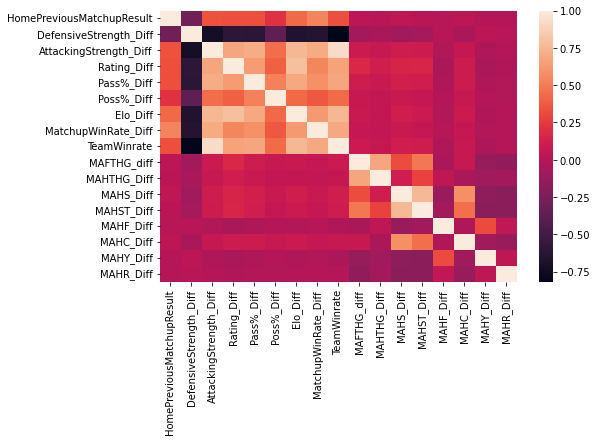

In [16]:
# Creating correlation matrix
# Adjusting figure size for Correlation matrix
plt.figure(figsize=(8, 5))
# Creating a correlation matrix using visual.corr() and using seaborn to visualise
# this as a heatmap
sns.heatmap(visual.corr(numeric_only = True))

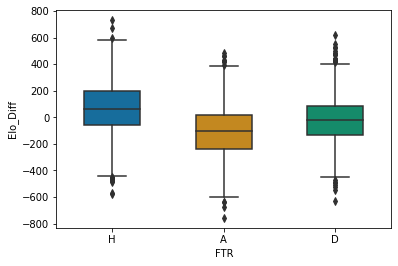

In [17]:
# Creating boxplots for home and away team Elo score Difference vs FTR
bplot1 = sns.boxplot(y='Elo_Diff', x='FTR', 
                 data=visual, 
                 width=0.5,
                 palette="colorblind")

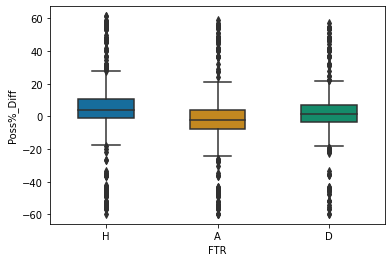

In [18]:
# Creating boxplots for home and away team possession percentage Difference vs FTR
bplot2 = sns.boxplot(y='Poss%_Diff', x='FTR', 
                 data=visual, 
                 width=0.5,
                 palette="colorblind")

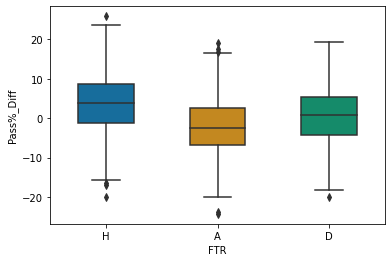

In [19]:
# Creating boxplots for home and away team passes accuracy percentage Difference vs FTR
bplot3 = sns.boxplot(y='Pass%_Diff', x='FTR', 
                 data=visual, 
                 width=0.5,
                 palette="colorblind")

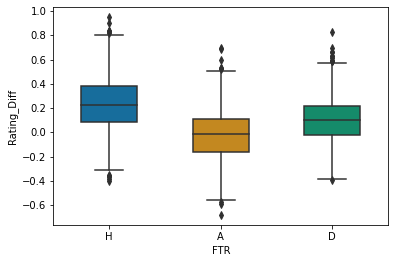

In [20]:
# Creating boxplots for home and away team rating Difference vs FTR
bplot4 = sns.boxplot(y='Rating_Diff', x='FTR', 
                 data=visual, 
                 width=0.5,
                 palette="colorblind")

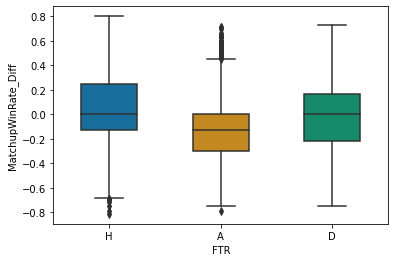

In [21]:
# Creating boxplots for home and away team matchup win rate Difference vs FTR
bplot5 = sns.boxplot(y='MatchupWinRate_Diff', x='FTR', 
                 data=visual, 
                 width=0.5,
                 palette="colorblind")

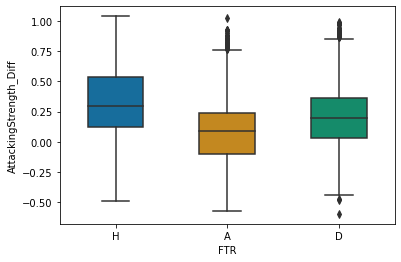

In [22]:
# Creating boxplots for home and away team attacking strength Difference vs FTR
bplot6 = sns.boxplot(y='AttackingStrength_Diff', x='FTR', 
                 data=visual, 
                 width=0.5,
                 palette="colorblind")

In [23]:
# initialise final training features and labels
X = pd.DataFrame()
Y_class = []
Y_reg = []

In [24]:
# for each matchup check if both teams have played n matches if so 
# include the rolling avg of the difference of both teams in the training features
# also include the match outcome and goal diff in the classification and regression labels respectively
n = 8
for i in range(len(data_train)):
    date = data_train.loc[i,"Date"]
    ht = data_train.loc[i,"HomeTeam"]
    at = data_train.loc[i,"AwayTeam"]
    rolling_avg_ht = get_rolling_average(data_train,ht,n,date)
    rolling_avg_at = get_rolling_average(data_train,at,n,date)
    if not (rolling_avg_ht.empty or rolling_avg_at.empty):
        extra_features = get_extra_features(data_train,i)
        X = pd.concat([X, pd.concat([rolling_avg_ht-rolling_avg_at,extra_features],axis=1)], axis=0)
        Y_class.append(data_train.iloc[i]["FTR"])
        Y_reg.append(data_train.iloc[i]["FTHG"]-data_train.iloc[i]["FTAG"])

In [25]:
# scale each feature in the training dataset
for col in X.columns:
    X[col] = scale(X[col])

In [26]:
# Define function to compute the accuracy of the predictions compared to the actual outcomes
def get_accuracy(target,pred):
    correct = 0
    for i in range(len(target)):
        if target[i] == pred[i]:
            correct += 1
    return correct/len(target)

# Methodology Overview

Extra features including Elo rating, Win rate, Team strength, Matchup win rate, Pass percentage, Possession percentage for both Home and Away team for each matchup in both train and test dataset were calculated and integrated into the initial given dataset, which was then exported and used at the beginning of this notebook. Code for these calculations can be found at the end of this notebook in the "Appendix" section.

# Model Training & Validation

In this part of the notebook, the initial dataset was split into training and test set for both classification and regression. A stratified validation set for the labelled set was created in order to split the outcomes evenly. Next, 6 classifiers and 4 regressors models were introduced. These are:

- Logistic Regression

- Support Vector Classifier 

- Multi-Layer Perceptron Classifier

- k-Nearest Neighbour Classifier

- Random Forest Classifier

- Gaussian Naive Bayes Classifier

- Random Forest Regressor

- Linear Regression

- Support Vector Regressor

- Multi-Layer Perceptron Regressor

Grid search was imported from Scikit learn to figure out the best set of hyperparamters for the models that have these. During this process, a stratified k-fold cross validation of 5 and 10 were used. For some models, like the Linear regression and the Gaussian naive bayes, there was no hyperparameters to improve on, so it was left empty.

In [27]:
# split training dataset to trainig and test set using 67% of the data to train the model and 33% for testing
# this was done for both classification and regression models
X_train_class, X_test_class,y_train_class, y_test_class = train_test_split(X,Y_class,test_size=0.33, random_state=42, stratify = Y_class)

X_train_reg, X_test_reg,y_train_reg, y_test_reg = train_test_split(X,Y_reg,test_size=0.33, random_state=42, stratify = Y_class)

In [28]:
# defining a new parameter that shows all the results for each combination of hyperparametrs highlighting the best one
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [29]:
# loading Random Forest Classifier with different hyperparameters
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [30]:
# loading grid search that uses a cross validation of 10 stratified folds for the training set
cv = GridSearchCV(rfc,parameters,cv=10)
cv.fit(X_train_class, y_train_class)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [31]:
# displaying the results
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.527 + or -0.012 for the {'max_depth': 2, 'n_estimators': 5}
0.532 + or -0.015 for the {'max_depth': 2, 'n_estimators': 10}
0.534 + or -0.015 for the {'max_depth': 2, 'n_estimators': 50}
0.535 + or -0.015 for the {'max_depth': 2, 'n_estimators': 100}
0.536 + or -0.014 for the {'max_depth': 2, 'n_estimators': 250}
0.534 + or -0.019 for the {'max_depth': 4, 'n_estimators': 5}
0.538 + or -0.015 for the {'max_depth': 4, 'n_estimators': 10}
0.539 + or -0.017 for the {'max_depth': 4, 'n_estimators': 50}
0.539 + or -0.017 for the {'max_depth': 4, 'n_estimators': 100}
0.539 + or -0.015 for the {'max_depth': 4, 'n_estimators': 250}
0.521 + or -0.017 for the {'max_depth': 8, 'n_estimators': 5}
0.528 + or -0.02 for the {'max_depth': 8, 'n_estimators': 10}
0.539 + or -0.014 for the {'max_depth': 8, 'n_estimators': 50}
0.539 + or -0.014 for the {'max_depth': 8, 'n_estimators': 100}
0.543 + or -0.017 for the {'max_depth': 8, 'n_estimators

In [32]:
# prediction parameter using the best hyperparameters
rfc_prediction = cv.predict(X_test_class)

# print(classification_report(y_test_class,prediction_class))
print(get_accuracy(y_test_class,rfc_prediction))

0.558714918759232


In [33]:
#define gridsearch parameters for logistic regression
#fit model to train dataset with 5 fold corss validation
parameters = {'penalty':['l2'], 'C':[0.1, 1, 10],'solver':('newton-cg', 'lbfgs', 'liblinear')}
logreg = GridSearchCV(LogisticRegression(),parameters,cv=5)
logreg.fit(X_train_class,y_train_class)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ('newton-cg', 'lbfgs', 'liblinear')})

In [34]:
# displaying the results
display(logreg)

Best parameters are: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


0.541 + or -0.014 for the {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.541 + or -0.014 for the {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.54 + or -0.012 for the {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.541 + or -0.015 for the {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.541 + or -0.015 for the {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.54 + or -0.013 for the {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.541 + or -0.015 for the {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.541 + or -0.015 for the {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.54 + or -0.014 for the {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [35]:
#predict test class using logsitic regression and best parameters found
logreg_prediction = logreg.predict(X_test_class)
print(get_accuracy(y_test_class,logreg_prediction))

0.5605612998522895


In [36]:
# loading Gaussian Naive Bayes for the training set
gnb = GaussianNB()
gnb.fit(X_train_class, y_train_class)

GaussianNB()

In [37]:
# prediction parameter using the test class
gnb_prediction = gnb.predict(X_test_class)

# print(classification_report(y_test_class,prediction_class))
print(get_accuracy(y_test_class,gnb_prediction))

0.5236336779911374


In [38]:
# loading k Nearest Neighbour with different hyperparameters
KNN = KNeighborsClassifier(metric = "euclidean")
parameters = {
    "n_neighbors":[40,50,60,100],
    "p":[3]
    
}

In [39]:
# Using grid search for a 10 fold stratified cross validation for the training set
cv = GridSearchCV(KNN,parameters,cv=10)
grid_search = cv.fit(X_train_class, y_train_class)

In [40]:
# displaying the results
display(cv)

Best parameters are: {'n_neighbors': 100, 'p': 3}


0.52 + or -0.017 for the {'n_neighbors': 40, 'p': 3}
0.52 + or -0.02 for the {'n_neighbors': 50, 'p': 3}
0.52 + or -0.014 for the {'n_neighbors': 60, 'p': 3}
0.531 + or -0.018 for the {'n_neighbors': 100, 'p': 3}


In [41]:
# prediction parameter using the test class
knn_prediction = cv.predict(X_test_class)
# print(classification_report(y_test_class,prediction_class))
print(get_accuracy(y_test_class,knn_prediction))

0.5520679468242246


In [42]:
#define gridsearch parameters for svc
#fit model to train dataset with 5 fold corss validation
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10],'degree':[1,2]}
svc = GridSearchCV(SVC(), parameters,cv=5)
svc.fit(X_train_class,y_train_class)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'degree': [1, 2],
                         'kernel': ('poly', 'rbf')})

In [43]:
display(svc)

Best parameters are: {'C': 1, 'degree': 1, 'kernel': 'poly'}


0.54 + or -0.011 for the {'C': 1, 'degree': 1, 'kernel': 'poly'}
0.536 + or -0.008 for the {'C': 1, 'degree': 1, 'kernel': 'rbf'}
0.458 + or -0.0 for the {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.536 + or -0.008 for the {'C': 1, 'degree': 2, 'kernel': 'rbf'}
0.539 + or -0.011 for the {'C': 10, 'degree': 1, 'kernel': 'poly'}
0.5 + or -0.009 for the {'C': 10, 'degree': 1, 'kernel': 'rbf'}
0.457 + or -0.001 for the {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.5 + or -0.009 for the {'C': 10, 'degree': 2, 'kernel': 'rbf'}


In [44]:
#predict test class using svc and best parameters found
svc_prediction = svc.predict(X_test_class)
print(get_accuracy(y_test_class,svc_prediction))

0.560930576070901


In [45]:
#define gridsearch parameters for multilayer perceptron classifier
#fit model to train dataset with 5 fold corss validation
parameters = {'solver':['sgd','adam'],'activation':['relu'],'hidden_layer_sizes':[(30,15),(20,10),(10,5)],'max_iter':[100000]}
mlpc = GridSearchCV(MLPClassifier(),parameters,cv=5)
mlpc.fit(X_train_class,y_train_class)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(30, 15), (20, 10), (10, 5)],
                         'max_iter': [100000], 'solver': ['sgd', 'adam']})

In [46]:
display(mlpc)

Best parameters are: {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 100000, 'solver': 'sgd'}


0.532 + or -0.01 for the {'activation': 'relu', 'hidden_layer_sizes': (30, 15), 'max_iter': 100000, 'solver': 'sgd'}
0.473 + or -0.015 for the {'activation': 'relu', 'hidden_layer_sizes': (30, 15), 'max_iter': 100000, 'solver': 'adam'}
0.537 + or -0.017 for the {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 100000, 'solver': 'sgd'}
0.499 + or -0.013 for the {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 100000, 'solver': 'adam'}
0.537 + or -0.009 for the {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'max_iter': 100000, 'solver': 'sgd'}
0.529 + or -0.014 for the {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'max_iter': 100000, 'solver': 'adam'}


In [47]:
#predict test class using mlpc and best parameters found
mlpc_prediction = mlpc.predict(X_test_class)
print(get_accuracy(y_test_class,mlpc_prediction))

0.5461595273264401


In [48]:
# loading Random Forest Regression with different hyperparameters
rfr = RandomForestRegressor()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [49]:
# Using grid search for a 10 fold stratified cross validation for the training set
cv = GridSearchCV(rfr,parameters,cv=10)
cv.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [50]:
# displaying the results
display(cv)

Best parameters are: {'max_depth': 4, 'n_estimators': 250}


0.178 + or -0.031 for the {'max_depth': 2, 'n_estimators': 5}
0.18 + or -0.03 for the {'max_depth': 2, 'n_estimators': 10}
0.18 + or -0.03 for the {'max_depth': 2, 'n_estimators': 50}
0.181 + or -0.031 for the {'max_depth': 2, 'n_estimators': 100}
0.182 + or -0.031 for the {'max_depth': 2, 'n_estimators': 250}
0.212 + or -0.033 for the {'max_depth': 4, 'n_estimators': 5}
0.215 + or -0.035 for the {'max_depth': 4, 'n_estimators': 10}
0.221 + or -0.036 for the {'max_depth': 4, 'n_estimators': 50}
0.222 + or -0.035 for the {'max_depth': 4, 'n_estimators': 100}
0.222 + or -0.036 for the {'max_depth': 4, 'n_estimators': 250}
0.174 + or -0.041 for the {'max_depth': 8, 'n_estimators': 5}
0.201 + or -0.034 for the {'max_depth': 8, 'n_estimators': 10}
0.219 + or -0.041 for the {'max_depth': 8, 'n_estimators': 50}
0.219 + or -0.038 for the {'max_depth': 8, 'n_estimators': 100}
0.221 + or -0.038 for the {'max_depth': 8, 'n_estimators': 

In [51]:
# prediction parameter using the test class
rfr_prediction = cv.predict(X_test_reg)
# defining the home and away win and draw
rfr_prediction = ["H" if p > 0.1 else "A" if p < -0.1 else "D" for p in rfr_prediction]
# print(classification_report(y_test_class,prediction_class))
print(get_accuracy(y_test_class,rfr_prediction))

0.551698670605613


In [52]:
#fit linear regresion to train dataset with goal differences as labels
linreg = LinearRegression()
linreg.fit(X_train_reg,y_train_reg)

LinearRegression()

In [53]:
#predict goal differences using linear regression
#convert to classes using thresholds
lr_prediction = linreg.predict(X_test_reg)
lr_prediction = ["H" if p > 0.1 else "A" if p < -0.1 else "D" for p in lr_prediction]
print(get_accuracy(y_test_class,lr_prediction))

0.560192023633678


In [54]:
#define gridsearch parameters for svr
#fit model to train dataset with 5 fold corss validation
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10],'degree':[1,2]}
svr = GridSearchCV(svm.SVR(),parameters,cv=5)
svr.fit(X_train_reg,y_train_reg)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10], 'degree': [1, 2],
                         'kernel': ('poly', 'rbf')})

In [55]:
display(svr)

Best parameters are: {'C': 10, 'degree': 1, 'kernel': 'poly'}


0.224 + or -0.029 for the {'C': 1, 'degree': 1, 'kernel': 'poly'}
0.195 + or -0.036 for the {'C': 1, 'degree': 1, 'kernel': 'rbf'}
-0.017 + or -0.008 for the {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.195 + or -0.036 for the {'C': 1, 'degree': 2, 'kernel': 'rbf'}
0.224 + or -0.029 for the {'C': 10, 'degree': 1, 'kernel': 'poly'}
0.103 + or -0.043 for the {'C': 10, 'degree': 1, 'kernel': 'rbf'}
-0.024 + or -0.014 for the {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.103 + or -0.043 for the {'C': 10, 'degree': 2, 'kernel': 'rbf'}


In [56]:
#predict goal differences using svr and best parameters found 
#convert to classes using thresholds
svr_prediction = svr.predict(X_test_reg)
svr_prediction = ["H" if p > 0.1 else "A" if p < -0.1 else "D" for p in svr_prediction]
print(get_accuracy(y_test_class,svr_prediction))

0.5561299852289513


In [57]:
#define gridsearch parameters for multi layer perceptron regressor
#fit model to train dataset with 5 fold corss validation
parameters = {'solver':['sgd','adam'],'activation':['relu'],'hidden_layer_sizes':[(30,15),(20,10),(10,5)],'max_iter':[100000]}
mlpr = GridSearchCV(MLPRegressor(),parameters,cv=5)
mlpr.fit(X_train_reg,y_train_reg)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(30, 15), (20, 10), (10, 5)],
                         'max_iter': [100000], 'solver': ['sgd', 'adam']})

In [58]:
display(mlpr)

Best parameters are: {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'max_iter': 100000, 'solver': 'sgd'}


0.112 + or -0.047 for the {'activation': 'relu', 'hidden_layer_sizes': (30, 15), 'max_iter': 100000, 'solver': 'sgd'}
0.071 + or -0.04 for the {'activation': 'relu', 'hidden_layer_sizes': (30, 15), 'max_iter': 100000, 'solver': 'adam'}
0.169 + or -0.046 for the {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 100000, 'solver': 'sgd'}
0.126 + or -0.058 for the {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 100000, 'solver': 'adam'}
0.212 + or -0.041 for the {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'max_iter': 100000, 'solver': 'sgd'}
0.205 + or -0.035 for the {'activation': 'relu', 'hidden_layer_sizes': (10, 5), 'max_iter': 100000, 'solver': 'adam'}


In [59]:
#predict goal differences using mlpr and best parameters found 
#convert to classes using thresholds
mlpr_prediction = mlpr.predict(X_test_reg)
mlpr_prediction = ["H" if p > 0.1 else "A" if p < -0.1 else "D" for p in mlpr_prediction]
print(get_accuracy(y_test_class,mlpr_prediction))

0.5576070901033974


# Results


This section shows the results for each model after tuning each hyperparameters to their optimal values. It's turned out that with n = 8 past matches, a highest average accuracy was found. Therefore, the accuracy for each model was shown below. It was found that SVC works the best with an accuracy of 56.09%. Therefore, a confusion matrix of that model was created to determine how the model predicted the home or away win and how it dealt with draws instead.

Lastly, a relative importance of features was investigated in order to determine the features that had the most crucial role compared to the others for the model prediction.

<Figure size 432x288 with 0 Axes>

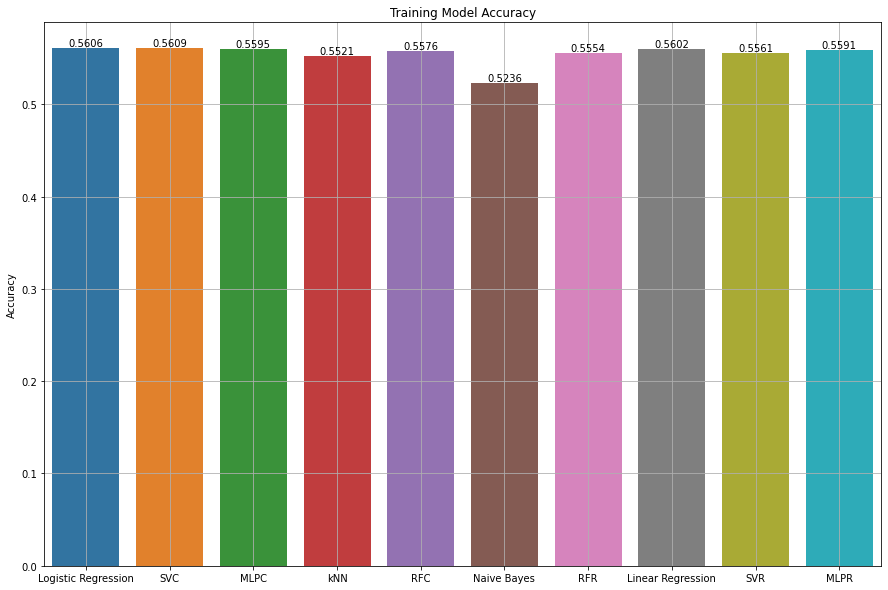

In [60]:
fig = plt.figure()
model = ['Logistic Regression', 'SVC', 'MLPC', 'kNN', 'RFC', 'Naive Bayes', 'RFR', 'Linear Regression', 'SVR', 'MLPR']
accuracy = [0.5606,0.5609,0.5595,0.5521,0.5576,0.5236,0.5554,0.5602,0.5561,0.5591]
plt.figure(figsize=(15,10))
sns.barplot(x = model,y = accuracy)
plt.grid()
plt.ylabel('Accuracy')
plt.title('Training Model Accuracy')
for i in range (len(model)):
  plt.text(i, accuracy[i], accuracy[i], ha = 'center', va = 'bottom')
plt.show()

# Feature Importance

We shall use permutation analysis to assess each feature importance. This is because it is compatible with the svc model which has been found to have the greatest accuracy for this dataset

In [61]:
# performing permutation importance for the custom dataset for our support vector classifier model
r = permutation_importance(svc, X_train_class, y_train_class, scoring='accuracy',random_state =42)
# Finding the importance of each feature
importance = r.importances_mean

# Displaying scores for each feature
for feature,score in enumerate(importance):
    print('Feature: {}  Score: {}' .format(feature,score))

Feature: 0  Score: 0.0002546380502001178
Feature: 1  Score: -0.0015642051655146761
Feature: 2  Score: 0.013568570389232471
Feature: 3  Score: 0.0004001455074572613
Feature: 4  Score: 0.0006547835576573791
Feature: 5  Score: 0.0019643506729720263
Feature: 6  Score: 0.00025463805020009556
Feature: 7  Score: -0.00014550745725714354
Feature: 8  Score: 0.00014550745725721014
Feature: 9  Score: 0.004256093124772664
Feature: 10  Score: 0.004219716260458384
Feature: 11  Score: 0.0507457257184431
Feature: 12  Score: 0.006620589305201929
Feature: 13  Score: -0.0009457984721716661
Feature: 14  Score: 3.6376864314346946e-05
Feature: 15  Score: -0.0006911604219715928


<Figure size 432x288 with 0 Axes>

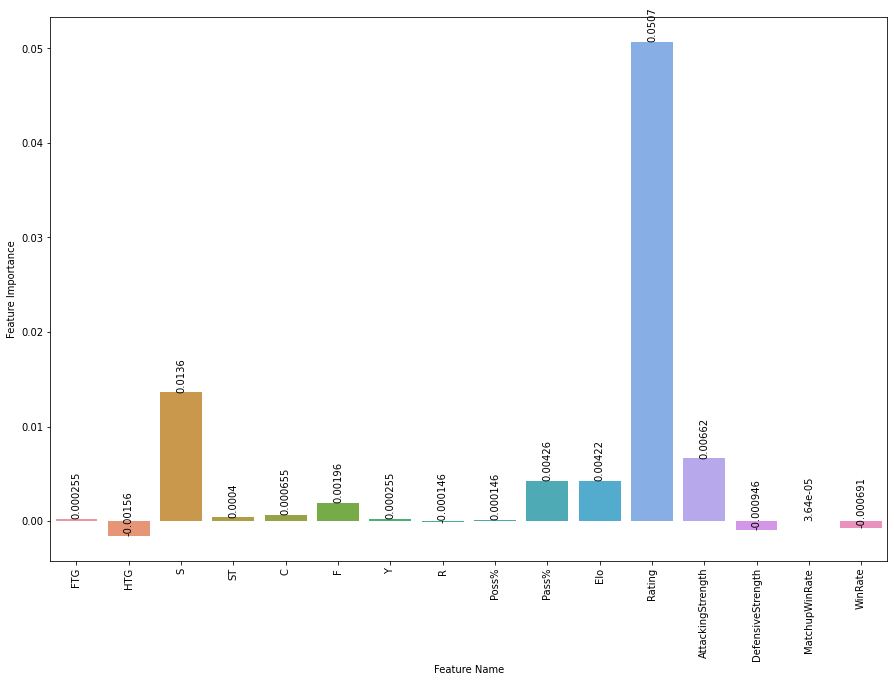

In [62]:
fig = plt.figure()
Names = ["FTG","HTG","S","ST","C","F","Y","R","Poss%","Pass%","Elo","Rating",
             "AttackingStrength","DefensiveStrength","MatchupWinRate","WinRate"]
Score = [ 2.55e-04, -1.56e-03,  1.36e-02,  4.00e-04,
  6.55e-04,  1.96e-03,  2.55e-04, -1.46e-04,
  1.46e-04,  4.26e-03,  4.22e-03,  5.07e-02,
  6.62e-03, -9.46e-04,  3.64e-05, -6.91e-04,]
plt.figure(figsize=(15,10))
sns.barplot(x = Names,y = Score)
plt.xlabel('Feature Name')
plt.ylabel("Feature Importance")
plt.xticks(rotation='vertical')
for i in range (len(Names)):
  plt.text(i, Score[i], Score[i], ha = 'center', va = 'bottom', rotation = "vertical")
plt.show()
plt.show()

# PCA

In [63]:
#Applying PCA
pca = PCA()
pca.fit_transform(X_train_class)

array([[-1.94943621, -0.39296455, -0.18715461, ..., -0.09985795,
         0.03993214, -0.06694929],
       [ 2.73290379, -1.84414822, -1.53607198, ..., -0.87393489,
        -0.44441615, -0.05989588],
       [-3.87673037, -2.61421443,  1.05435091, ...,  0.03938169,
        -0.03800388,  0.03654491],
       ...,
       [-4.94400921,  0.52056812,  0.02566559, ..., -0.25431441,
         0.02728117, -0.38562131],
       [ 1.03835658,  1.60707181, -0.13638146, ..., -0.18352021,
        -0.02478223,  0.33132394],
       [-1.96206905,  1.82726524, -1.44898699, ..., -0.38153622,
         0.32099091,  0.13177631]])

In [64]:
svc_prediction_class = svc.predict(X_test_class)
print(get_accuracy(y_test_class,svc_prediction_class))

0.560930576070901


In [65]:
#Finding the explained variance. This is used in excel to plot the cumulative
#explained variance figure in the report
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.49182445 0.08689062 0.07564217 0.06443776 0.05490017 0.05200033
 0.03327045 0.03125261 0.02374859 0.02074145 0.01782429 0.01692593
 0.01330542 0.00877913 0.00535782 0.00309881]


In [66]:
#number of principle components chosen based on 95% confidence interval
#Training with 11 principal components using an SVC model
pca = PCA(n_components = 11)
X_train_pca = pca.fit_transform(X_train_class)
X_test_pca = pca.transform(X_test_class)
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10],'degree':[1,2]}
svc_pca = GridSearchCV(SVC(), parameters,cv=5)
svc_pca.fit(X_train_pca,y_train_class)
svc_prediction_pca = svc_pca.predict(X_test_pca)
#print(classification_report(y_test_class,svc_prediction_class))
print(get_accuracy(y_test_class,svc_prediction_pca))

0.560930576070901


# Confusion Matrix

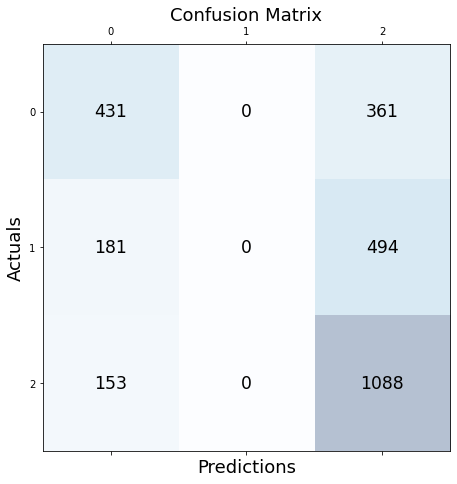

In [67]:
conf_matrix = confusion_matrix(y_test_class,svc_prediction_pca)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Final Predictions on Test Set

Lastly, this section is dedicated to the code used to predict the matches of matchweek 20. The prediction showed no draws which implies that the training data had fewer draws matches than win or losses which affected the algorithm's prediction.

In [68]:
#collect features required to predict lables of test dataset using found best n value
test_x = pd.DataFrame()
n = 8
for i in range(len(data_test)):
    date = data_test.loc[i,"Date"]
    ht = data_test.loc[i,"HomeTeam"]
    at = data_test.loc[i,"AwayTeam"]
    rolling_avg_ht = get_rolling_average(data_train,ht,n,date)
    rolling_avg_at = get_rolling_average(data_train,at,n,date)
    if not (rolling_avg_ht.empty or rolling_avg_at.empty):
        extra_features = get_extra_features(data_test,i)
        test_x = pd.concat([test_x, pd.concat([rolling_avg_ht-rolling_avg_at,extra_features],axis=1)], axis=0)

In [69]:
#scale the features
for col in test_x.columns:
    test_x[col] = scale(test_x[col])

In [70]:
#transform the features using trained pca
test_x = pca.transform(test_x)

In [71]:
#predict labels for test class using found best model with pca -- svr
final_pred = svc_pca.predict(test_x)

In [72]:
#add labels to test csv and export 
submission = pd.read_csv("epl-test.csv")
submission["FTR"] = final_pred
submission.to_csv("submission.csv",index=False)

In [73]:
submission

,Date,HomeTeam,AwayTeam,FTR
0,14/01/2023,Aston Villa,Leeds,H
1,14/01/2023,Brentford,Bournemouth,H
2,14/01/2023,Brighton,Liverpool,A
3,14/01/2023,Chelsea,Crystal Palace,H
4,14/01/2023,Everton,Southampton,H
5,14/01/2023,Man United,Man City,A
6,14/01/2023,Newcastle,Fulham,H
7,14/01/2023,Nott'm Forest,Leicester,A
8,14/01/2023,Tottenham,Arsenal,A
9,14/01/2023,Wolves,West Ham,A


# Appendix

In the appendix below the code related to the new features were desrcibed. These include:

- Home and away team Elo ratings

- Home and away team Matchup win rate

- Home and away team win rate

- Home and away attacking strength

- Home and away defensive strength

# Import Data

In [102]:
import pandas as pd
data = pd.read_csv("epl-training.csv")
initial_elo_data = pd.read_csv("initial_elos.csv")

# Initial Elo

Initialises the elo for each group. One function sets them all the 1000, another one reads off a csv file.

In [103]:
def elo_1000(data):
    'returns a dictionary of elo scores for each team set to 1000'
    elo_1000 = {}
    home_team_index, away_team_index = get_indices(data)
    for row in range(data.shape[0]):
        for column in [home_team_index, away_team_index]:
            team = data.iloc[row,column]
            if team not in elo_1000:
                elo_1000[team] = 1000
    return elo_1000

def get_indices(data, column_names):
    'input data and a list of names to find indices for. returns a list of indices'
    indices = []
    for name in column_names:
        indices.append(data.columns.get_loc(name))
    return indices

def initial_elo(data):
    'reads a csv file with initial elos for each team'
    initial_elo = {}
    team_name_index, elo_index = get_indices(data, ['Unique teams', 'Initial ELO Values'])
    for row in range(data.shape[0]):
        initial_elo[data.iloc[row,team_name_index]] = data.iloc[row,elo_index]
    return initial_elo

def fill_teams(data, elos):
    'takes list of elos and sets all missed teams to 1000 elo'
    for row in range(data.shape[0]):
        for column in [1, 2]:
            team = data.iloc[row,column]
            if team not in elos:
                elos[team] = 1000
    return elos

# Elo Calculation

Uses the formula on wikipedia page for 'world football elo ratings'. The same formula can be found elsewhere.

In [104]:
def elo_calc(target_team, other_team, goal_difference, elo_scores, home_team, result):
    K = 40 # for non-major tournaments
    denom = 10**(-dr(target_team, other_team, elo_scores)/400) + 1
    new_elo = elo_scores[target_team] + K*G(goal_difference)*(W(target_team, home_team, result)-1/denom)
    return new_elo

def G(goal_difference):
    'goal difference index'
    if goal_difference < 2:
        g = 1
    elif goal_difference == 2:
        g = 3/2
    else:
        g = (11+goal_difference)/8
    return g

def dr(target_team, other_team, elo_scores):
    'elo difference'
    target_team_elo = elo_scores[target_team]
    other_team_elo = elo_scores[other_team]
    dr = target_team_elo - other_team_elo
    return dr
    
def W(target_team, home_team, result):
    'number depending on the result'
    w = 0
    if result == 'D':
        w = 0.5
    elif target_team == home_team:
        if result == 'H':
            w = 1
    else:
        if result == 'A':
            w = 1
    return w

# Generate Elos

Elo ratings are updated after each game.

In [105]:
def generate_elos(data, elo_scores):
    'takes in match data and inintial elo scores then returns lists of the home and away team elos for each match'
    home_team_elo = [] # initialise lists for data storage
    away_team_elo = []

    for row in range(data.shape[0]): # for each match
        
        home_team_index, away_team_index, FTHG_index, FTAG_index, FTR_index = get_indices(data, ['HomeTeam','AwayTeam','FTHG','FTAG','FTR'])
        home_team = data.iloc[row,home_team_index] # find useful data for each match
        away_team = data.iloc[row,away_team_index]
        home_goals = data.iloc[row,FTHG_index]
        away_goals = data.iloc[row,FTAG_index]
        result = data.iloc[row,FTR_index]

        goal_difference = home_goals-away_goals # calculate goal difference
        if goal_difference < 1:
            goal_difference *= -1

        # current home and away team elos
        home_team_elo.append(elo_scores[home_team])
        away_team_elo.append(elo_scores[away_team])

        # calculate new elos
        new_home_team_elo = elo_calc(home_team, away_team, goal_difference, elo_scores, home_team, result) # calculate new elo
        new_away_team_elo = elo_calc(away_team, home_team, goal_difference, elo_scores, home_team, result)

        elo_scores[home_team] = new_home_team_elo # update elo
        elo_scores[away_team] = new_away_team_elo

    return home_team_elo, away_team_elo, elo_scores

# Running Elo Generation

Finding the final elos for each team.

In [106]:
elo_scores = initial_elo(initial_elo_data) # elo for each team is initialised
elo_scores = fill_teams(data, elo_scores) # missing teams are initialised
home_team_elo, away_team_elo, final_scores = generate_elos(data, elo_scores) # elos are generated

data['HomeTeamElo'] = home_team_elo # add to csv
data['AwayTeamElo'] = away_team_elo

export_data = False
if export_data:
    data.to_csv('home_n_away_elo_with_init_elos.csv')

print(final_scores)

{'Charlton': 1862.5063327184514, 'Chelsea': 2055.021224456863, 'Coventry': 1819.9783610172553, 'Derby': 1601.8322836496195, 'Leeds': 1883.8462132792606, 'Leicester': 1958.2880703056574, 'Liverpool': 2187.355915815568, 'Sunderland': 1764.2853403200982, 'Tottenham': 2131.1039805273404, 'Man United': 2102.7649385159834, 'Arsenal': 2195.4845289826426, 'Bradford': 1770.456656052701, 'Ipswich': 1849.5231951609044, 'Middlesbrough': 1774.9302936798101, 'Everton': 1936.683397849172, 'Man City': 2326.314961787349, 'Newcastle': 2137.1975835761714, 'Southampton': 1847.4440507813877, 'West Ham': 1958.742851797833, 'Aston Villa': 1895.207161191757, 'Bolton': 1850.668839243225, 'Blackburn': 1809.395542302713, 'Fulham': 1902.1352251568137, 'Birmingham': 1841.368729049141, 'West Brom': 1814.0149034301146, 'Wolves': 1831.5300155092834, 'Portsmouth': 1827.256828354347, 'Norwich': 1701.9253769204417, 'Crystal Palace': 1982.388986598171, 'Wigan': 1885.730715791088, 'Watford': 1719.1660000377249, 'Sheffield

# Adding elo scores to test data

The test data needs to have the same features, these are the latest calculated elo scores for each team.

In [107]:
data_test = pd.read_csv("epl-test.csv") # the epl-test file

def extract_teams(data):
    'list the teams in the test data set'
    teams_of_interest = []
    home_team_index, away_team_index = get_indices(data, ['HomeTeam','AwayTeam'])
    for column in [home_team_index,away_team_index]:
        for row in range(data.shape[0]):
            team = data.iloc[row,column]
            if team not in teams_of_interest:
                teams_of_interest.append(team)
    return teams_of_interest

def find_missing_teams(teams_of_interest, final_scores):
    'checks if teams do not already have elos'
    missing_teams = []
    for team in teams_of_interest:
        if team not in final_scores:
            missing_teams.append(team)
    return missing_teams

def compile_home_n_away_elo(data, final_scores):
    'generates the home and away elos for the dataset'
    home_elo = []
    away_elo = []
    home_team_index, away_team_index = get_indices(data, ['HomeTeam','AwayTeam'])
    for column in [home_team_index,away_team_index]:
        for row in range(data.shape[0]):
            team = data.iloc[row,column]
            if column == 1:
                home_elo.append(final_scores[team])
            else:
                away_elo.append(final_scores[team])
    return home_elo, away_elo

teams_of_interest = extract_teams(data_test) # extract teams from the test file
missing_teams = find_missing_teams(teams_of_interest, final_scores) # see if any of them do not already have elo ratings
print('missing teams are:', missing_teams)

home_elo, away_elo = compile_home_n_away_elo(data_test, final_scores) # list each team's elo rating

data_test['HomeTeamElo'] = home_elo # add to csv
data_test['AwayTeamElo'] = away_elo

export_data = False # create csv
if export_data:
    data_test.to_csv('epl_test_with_home_n_away_elos.csv')

missing teams are: []


# Winrate calculation

The data is stored in a objects of the epl_team class. Wins and total games are tracked for each matchup, and then winrate is calculated. This class was used for future calculations as well.

In [108]:
import numpy as np

class epl_team:
    'each team has a name, opponents, and winwrate data'
    def __init__(self, name, opponents):
        self.name = name
        self.opponents = opponents

        self.matchup_wins = {} # dictionary of ('opponent': wins_vs_opponent)
        self.matchup_games = {} # ('opponent': games_vs_opponent)
        self.matchup_winrates = {} # ('opponent': winrate_vs_opponent)
        self.matchup_results = {} #('opponent': [list of results from previous matches])

        self.total_games = 0 # home and away win rate calculations
        self.home_wins = 0
        self.away_wins = 0
        self.home_games = 0
        self.away_games = 0
        self.home_winrate = 0
        self.away_winrate = 0

        self.home_attacking_strength = 0 # team strength calculations
        self.home_defensive_strength = 0
        self.away_attacking_strength = 0
        self.away_defensive_strength = 0
        self.home_goals_scored = 0
        self.away_goals_scored = 0
        self.home_goals_conceded = 0
        self.away_goals_conceded = 0
        
        for opponent in opponents: # initialise matchup calculations
            self.matchup_wins[opponent] = 0
            self.matchup_games[opponent] = 0
            self.matchup_winrates[opponent] = 0
            self.matchup_results[opponent] = []

    def update_matchup_winrates(self):
        'calculates win rate for each team using wins and total games in each matchup'
        for opponent in self.opponents:
            self.matchup_winrates[opponent] = (self.matchup_wins[opponent]+1)/(self.matchup_games[opponent]+3)

    def update_total_games(self):
        '''calculates a team's total games using total games in each matchup'''
        self.total_games = 0
        for matchup in self.matchup_games:
            self.total_games += self.matchup_games[matchup]    

    def update_home_away_winrate(self):
        'calculates the home and away win rates of a team'
        try:
            self.home_winrate = (self.home_wins+1)/(self.home_games+3)
            self.away_winrate = (self.away_wins+1)/(self.away_games+3)
        except ZeroDivisionError:
            pass

    def update_home_strength(self,avg_home_goals,avg_home_goals_conceded): # parameters are goals scored and conceded as home
        self.home_attacking_strength = (self.home_goals_scored+10)/(self.home_games+10)/avg_home_goals
        self.home_defensive_strength = (self.home_goals_conceded+10)/(self.home_games+10)/avg_home_goals_conceded

    def update_away_strength(self,avg_away_goals_conceded,avg_away_goals):
        self.away_attacking_strength = (self.away_goals_scored+10)/(self.away_games+10)/avg_away_goals
        self.away_defensive_strength = (self.away_goals_conceded+10)/(self.away_games+10)/avg_away_goals_conceded
    
    @classmethod
    def update_all_matchup_winrates(self, teams_data):
        for team in teams_data:
            teams_data[team].update_matchup_winrates()
            
    @classmethod
    def update_all_total_games(self, teams_data):
        for team in teams_data:
            teams_data[team].update_total_games()

    @classmethod
    def update_all_home_away_winrate(self, teams_data):
        for team in teams_data:
            teams_data[team].update_home_away_winrate()
    
    @classmethod
    def update_all_home_strength(self,teams_data,avg_fthg,avg_ftag):
        for team in (teams_data):
            teams_data[team].update_home_strength(avg_fthg,avg_ftag)
            
    @classmethod
    def update_all_away_strength(self,teams_data,avg_fthg,avg_ftag):
        for team in teams_data:
            teams_data[team].update_away_strength(avg_fthg,avg_ftag)

def init_teams(teams): 
    'create an object for each team in a list, return a dictionary of those objects'
    team_objects = {}
    for team in teams:
        remaining_teams = teams.copy()
        remaining_teams.remove(team)
        team_objects[team] = epl_team(team,remaining_teams)
    return team_objects

# Winrate tracking

Running through data and tracking wins and games to calculate matchup win rates.

In [109]:
def track_matchup_winrate(data, teams_data):
    'finds the number of wins and games played for each team in each matchup in the data'
    home_win_rate = [] # list for appedning to the csv as a feature
    away_win_rate = []
    home_team_index, away_team_index, FTR_index = get_indices(data, ['HomeTeam', 'AwayTeam','FTR'])
    epl_team.update_all_matchup_winrates(teams_data)

    for row in range(data.shape[0]): # for each match
        home_team = data.iloc[row,home_team_index] # find useful data for each match
        away_team = data.iloc[row,away_team_index]
        result = data.iloc[row,FTR_index]
        
        try:
            hwr = teams_data[home_team].matchup_winrates[away_team] # get the home winrate vs the away team
            awr = teams_data[away_team].matchup_winrates[home_team] # get the away winrate vs the home team
        except KeyError:
            hwr = np.nan
            awr = np.nan
        home_win_rate.append(hwr) # add to list for appending to csv
        away_win_rate.append(awr)
        
        try:
            teams_data[home_team].matchup_games[away_team] += 1 # add one game to the matchup
            teams_data[away_team].matchup_games[home_team] += 1
        except KeyError:
            teams_data[home_team].update_matchup_winrates()
            teams_data[away_team].update_matchup_winrates()
            continue

        if result == 'D': # ignore draws
            pass
        elif result == 'H':
            teams_data[home_team].matchup_wins[away_team] += 1 # add a win for the home team
        else:
            teams_data[away_team].matchup_wins[home_team] += 1 # or for the away team

        teams_data[home_team].update_matchup_winrates() # calculate new matchup winrate from the new data
        teams_data[away_team].update_matchup_winrates()
        
    return home_win_rate, away_win_rate

def compile_win_rates(teams_data, data):
    'puts matchup win rates into test csv'
    home_win_rate = []
    away_win_rate = []
    home_team_index, away_team_index = get_indices(data, ['HomeTeam', 'AwayTeam'])

    epl_team.update_all_matchup_winrates(teams_data)
    for row in range(data.shape[0]): # for each match
        home_team = data.iloc[row,home_team_index] # find useful data for each match
        away_team = data.iloc[row,away_team_index]
        try:
            home_team_wr = teams_data[home_team].matchup_winrates[away_team]
            away_team_wr = teams_data[away_team].matchup_winrates[home_team]
        except KeyError:
            home_team_wr = np.nan
            away_team_wr = np.nan
        home_win_rate.append(home_team_wr)
        away_win_rate.append(away_team_wr)
    
    return home_win_rate, away_win_rate

# Running Matchup Winrate calculation

The winrate for each matchup is generated and then picked out and appended to the .csv

In [114]:
data_train = pd.read_csv("elo_calculations1.csv")
data.head() # elo calculation dataframe that anishtan added to

teams = extract_teams(data_train) # find all unique teams
teams_data = init_teams(teams)
home_win_rate, away_win_rate = track_matchup_winrate(data_train, teams_data) # track matchup data

data_train['HomeMatchupWinRate'] = home_win_rate # append features to csv
data_train['AwayMatchupWinRate'] = away_win_rate

export = False
if export:
    data_train.to_csv('epl_train_elos_whoscored_winrates.csv')

# adding to the test data

home_win_rate, away_win_rate = compile_win_rates(teams_data, data_test)
data_test['HomeMatchupWinRate'] = home_win_rate
data_test['AwayMatchupWinRate'] = away_win_rate

export = False
if export:
    data_test.to_csv('epl_test_elo_winrate.csv')

# Home and away win rates

Home and away wins are tracked, then home and away winrates are calculated.

In [115]:
def track_home_away_wins(teams_data, data):
    'tracks home and away wins for each team in data in teams_data'

    home_team_home_winrates = [] # lists for csv
    away_team_away_winrates = []

    epl_team.update_all_total_games(teams_data) # initialise data
    epl_team.update_all_home_away_winrate(teams_data)
    for team in teams_data:
        teams_data[team].home_wins = 0 # initialise number of home and away wins and games
        teams_data[team].away_wins = 0
        teams_data[team].home_games = 0
        teams_data[team].away_games = 0
    home_team_index, away_team_index, FTR_index = get_indices(data, ['HomeTeam', 'AwayTeam', 'FTR'])

    for row in range(data.shape[0]): # for each match
        home_team = data.iloc[row,home_team_index] # find relevant data
        away_team = data.iloc[row,away_team_index]
        result = data.iloc[row,FTR_index]
        
        try:
            hwr = teams_data[home_team].home_winrate # find the home win rate of the home team
            awr = teams_data[away_team].away_winrate
        except KeyError:
            hwr = np.nan
            awr = np.nan
        
        home_team_home_winrates.append(hwr) # add to list for appending to the csv
        away_team_away_winrates.append(awr)

        teams_data[home_team].home_games += 1
        teams_data[away_team].away_games += 1

        if result == 'D':
            pass
        elif result == 'H':
            teams_data[home_team].home_wins += 1 # find who won and record their win
        else:
            teams_data[away_team].away_wins += 1

        teams_data[home_team].update_total_games() # update home and away win rates
        teams_data[away_team].update_total_games()
        teams_data[home_team].update_home_away_winrate()
        teams_data[away_team].update_home_away_winrate()
        
    return home_team_home_winrates, away_team_away_winrates

def compile_home_away_winrates(teams_data, data):
    'returns a list of adds home and away wins for appending to the test csv'
    home_team_home_winrates = [] # lists for appending to the csv
    away_team_away_winrates = []
    epl_team.update_all_home_away_winrate(teams_data)

    home_team_index, away_team_index = get_indices(data, ['HomeTeam','AwayTeam'])
    for row in range(data.shape[0]):
        home_team = data.iloc[row,home_team_index]
        away_team = data.iloc[row,away_team_index]
        home_team_home_winrates.append(teams_data[home_team].home_winrate)
        away_team_away_winrates.append(teams_data[away_team].away_winrate)

    return home_team_home_winrates, away_team_away_winrates

In [116]:
# generate home and away winrates for each team
home_team_home_winrates,away_team_away_winrates = track_home_away_wins(teams_data, data_train)

data_train['HomeTeamHomeWinrate'] = home_team_home_winrates # put into train csv
data_train['AwayTeamAwayWinrate'] = away_team_away_winrates

# put into test csv
home_team_home_winrates, away_team_away_winrate = compile_home_away_winrates(teams_data, data_test)

data_test['HomeTeamHomeWinrate'] = home_team_home_winrates
data_test['AwayTeamAwayWinrate'] = away_team_away_winrate

export = False
if export:
    data_train.to_csv('epl_train_updating_winrates.csv')
    data_test.to_csv('epl_test_updating_winrates.csv')

# Previous matchup results

Track the team's result in the last (few) time(s) they had the matchup.

In [117]:
def track_matchup_result(teams_data, data, n):
    'lists all the results for each matchup, n is previous n results'
    home_previous_matchup_results = [] # list for appending to the csv
    for team in teams_data:
        for opponent in teams_data[team].matchup_results:
            teams_data[team].matchup_results[opponent] = [] # initialise matchup data

    home_team_index, away_team_index, FTR_index = get_indices(data,['HomeTeam','AwayTeam','FTR'])
    for row in range(data.shape[0]): # for each match
        home_team = data.iloc[row,home_team_index] # find relevant data
        away_team = data.iloc[row,away_team_index]
        result = data.iloc[row,FTR_index]

        previous_result = 0
        try: # find previous home team result, add the previous n results together
            for i in range(n):
                previous_result += teams_data[home_team].matchup_results[away_team][-(i+1)]       
        except IndexError: # no previous result
            previous_result = 0.5
        except KeyError:
            home_previous_matchup_results.append(np.nan) # home team name is nan
            continue
        home_previous_matchup_results.append(previous_result)

        if result == 'D': # update previous matchup data
            teams_data[home_team].matchup_results[away_team].append(0.5) # 0.5 for a draw
            teams_data[away_team].matchup_results[home_team].append(0.5)
        elif result == 'H':
            teams_data[home_team].matchup_results[away_team].append(1) # 1 for a win
            teams_data[away_team].matchup_results[home_team].append(0) # 0 for a loss
        else:
            teams_data[home_team].matchup_results[away_team].append(0)
            teams_data[away_team].matchup_results[home_team].append(1)
    return home_previous_matchup_results

def final_matchup_results(teams_data, data, n):
    'find final matchup results for test csv'
    home_team_index, away_team_index = get_indices(data,['HomeTeam','AwayTeam'])
    home_previous_matchup_results = []
    
    for row in range(data.shape[0]):
        home_team = data.iloc[row,home_team_index]
        away_team = data.iloc[row,away_team_index]
        previous_result = 0

        try: # find previous home team result
            for i in range(n):
                previous_result += teams_data[home_team].matchup_results[away_team][-(i+1)]       
        except IndexError:
            previous_result = np.nan

        home_previous_matchup_results.append(previous_result)
    return home_previous_matchup_results

# Running the previous matchup(s)

Creating a list to put in the .csv

In [119]:
n = 1 # past n games
home_previous_matchup_results = track_matchup_result(teams_data, data_train, n) # find previous matchup results for train data
home_previous_matchup_results_test = final_matchup_results(teams_data, data_test, n) # add latest previous matchu results to test data

data_train['HomePreviousMatchupResult'] = home_previous_matchup_results # append to csv
data_test['HomePreviousMatchupResult'] = home_previous_matchup_results_test

export = False
if export:
    data_train.to_csv('epl_train_almost_final.csv')
    data_test.to_csv('epl_test_almost_final.csv')

# Team Strength

Calculating the attacking and defensive strength of the home and away teams

In [120]:
def track_team_strength(teams_data, data):
    'find the goals scored for and against each team, compare it to the average home and away team scores.'

    home_attacking_strength = [] # lists for appending to csv
    home_defensive_strength = []
    away_attacking_strength = []
    away_defensive_strength = []

    total_fthg = 0 # initialise data used to calculate initial team strength
    total_ftag = 0
    avg_fthg = 1
    avg_ftag = 1

    for team in teams_data:
        teams_data[team].home_goals_scored = 0 # initialise data for each team
        teams_data[team].away_goals_scored = 0
        teams_data[team].home_goals_conceded = 0
        teams_data[team].away_goals_conceded = 0
        teams_data[team].home_attacking_strength = 0
        teams_data[team].home_defensive_strength = 0
        teams_data[team].away_attacking_strength = 0
        teams_data[team].away_defensive_strength = 0
        teams_data[team].home_games = 0
        teams_data[team].away_games = 0

    epl_team.update_all_home_strength(teams_data,avg_fthg,avg_ftag) # initialise team strength
    epl_team.update_all_away_strength(teams_data,avg_fthg,avg_ftag)

    home_team_index, away_team_index, FTHG_index, FTAG_index = get_indices(data, ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG'])

    for row in range(data.shape[0]): # for each match
        home_team = data.iloc[row,home_team_index] # find relevant data
        away_team = data.iloc[row,away_team_index]
        fthg = data.iloc[row,FTHG_index]
        ftag = data.iloc[row,FTAG_index]

        try:
            has = teams_data[home_team].home_attacking_strength # find strengths to append
            hds = teams_data[home_team].home_defensive_strength
            aas = teams_data[away_team].away_attacking_strength
            ads = teams_data[away_team].away_defensive_strength
        except KeyError:# nan row
            has, hds, aas, ads = [np.nan for i in range(4)] 

        home_attacking_strength.append(has) # append to lists for appending to csv
        home_defensive_strength.append(hds)
        away_attacking_strength.append(aas)
        away_defensive_strength.append(ads)

        avg_fthg = (total_fthg+10)/(row+10) # calculate average goals scored per game overall
        avg_ftag = (total_ftag+10)/(row+10)

        if not pd.isna(fthg):
            teams_data[home_team].home_goals_scored += fthg
            teams_data[away_team].away_goals_scored += ftag
            teams_data[home_team].home_goals_conceded += ftag
            teams_data[away_team].away_goals_conceded += fthg
            teams_data[home_team].home_games += 1
            teams_data[away_team].away_games += 1
            total_fthg += fthg
            total_ftag += ftag

        teams_data[home_team].update_home_strength(avg_fthg,avg_ftag) # calculate home strength with new data
        teams_data[away_team].update_away_strength(avg_ftag,avg_fthg)

    return home_attacking_strength, home_defensive_strength, away_attacking_strength, away_defensive_strength, avg_fthg, avg_ftag

def compile_team_strength(teams_data, data, avg_fthg, avg_ftag):
    'adds home and away wins to the csv'
    home_team_attacking_strength = [] # lists for appending to the csv
    home_team_defensive_strength = []
    away_team_attacking_strength = []
    away_team_defensive_strength = []

    epl_team.update_all_home_strength(teams_data, avg_fthg, avg_ftag) # initialise data
    epl_team.update_all_away_strength(teams_data, avg_fthg, avg_ftag)
    home_team_index, away_team_index = get_indices(data, ['HomeTeam','AwayTeam'])
    for row in range(data.shape[0]):
        home_team = data.iloc[row,home_team_index] # find home and away teams
        away_team = data.iloc[row,away_team_index]
        home_team_attacking_strength.append(teams_data[home_team].home_attacking_strength)
        home_team_defensive_strength.append(teams_data[home_team].home_defensive_strength)
        away_team_attacking_strength.append(teams_data[away_team].away_attacking_strength)
        away_team_defensive_strength.append(teams_data[away_team].away_defensive_strength)

    return home_team_attacking_strength, home_team_defensive_strength, away_team_attacking_strength, away_team_defensive_strength

# Running team strength calculations

Some extra calculations required to start with.

In [122]:
# find strength of teams
home_attacking_str, home_defensive_str, away_attacking_str, away_defensive_str, avg_fthg, avg_ftag = track_team_strength(teams_data, data_train)

data_train['HomeAttackingStrength'] = home_attacking_str
data_train['HomeDefensiveStrength'] = home_defensive_str
data_train['AwayAttackingStrength'] = away_attacking_str
data_train['AwayDefensiveStrength'] = away_defensive_str

# compile to test csv
home_attacking_str, home_defensive_str, away_attacking_str, away_defensive_str = compile_team_strength(teams_data, data_test, avg_fthg, avg_ftag)

data_test['HomeAttackingStrength'] = home_attacking_str
data_test['HomeDefensiveStrength'] = home_defensive_str
data_test['AwayAttackingStrength'] = away_attacking_str
data_test['AwayDefensiveStrength'] = away_defensive_str

export = False
if export:
    data_train.to_csv('epl_train_final.csv')
    data_test.to_csv('epl_test_final.csv')

# Display stats

Displaying calculated statistics

In [123]:
def matchup_stats(teams_data, team, opponent):
    'displays generated matchup info between given teams'
    if opponent == 'all':
        print(f'''{team}: \nWins: \n{teams_data[team].matchup_wins}''', end = '\n\n')
        print(f'''Total games vs: \n{teams_data[team].matchup_games}''', end = '\n\n')
        print(f'''Winrate:\n{teams_data[team].matchup_winrates}''')
    else:
        print(f'''{team} vs {opponent}''', end = ' ')
        print(f'''(Total games: {teams_data[team].matchup_games[opponent]})''', end = '\n\n')
        print(f'''Wins:\n{team}: {teams_data[team].matchup_wins[opponent]}''', end = '\n')
        print(f'''{opponent}: {teams_data[opponent].matchup_wins[team]}''', end = '\n\n')
        print(f'''Matchup winrates:\n{team_of_interest}: {teams_data[team].matchup_winrates[opponent]}''', end = '\n')
        print(f'''{opponent}: {teams_data[opponent].matchup_winrates[team]}''', end = '\n\n')
    return None

def how_many_games(teams_data, team):
    if team == 'all':
        for team in teams_data:
            print(team, 'has played', teams_data[team].total_games, 'games')
    else:
        print(team, 'has played', teams_data[team].total_games, 'games')

def home_away_winrates(teams_data, team):
    if team == 'all':
        for team in teams_data:
            home_wins, away_wins, home_games, away_games, home_winrate, away_winrate = home_away_winrates_supp(teams_data,team)
            print(f'\n{team} has {home_wins}/{home_wins} ({home_winrate}) home wins and {away_wins}/{away_games} ({away_winrate}) away wins')
    else:
        home_wins, away_wins, home_games, away_games, home_winrate, away_winrate = home_away_winrates_supp(teams_data,team)
        print(f'{team} has {home_wins}/{home_games} ({home_winrate}) home wins and {away_wins}/{away_games} ({away_winrate}) away wins')

def home_away_winrates_supp(teams_data,team):
    home_wins = teams_data[team].home_wins
    away_wins = teams_data[team].away_wins
    home_games = teams_data[team].home_games
    away_games = teams_data[team].away_games
    home_winrate = teams_data[team].home_winrate
    away_winrate = teams_data[team].away_winrate
    return home_wins, away_wins, home_games, away_games, home_winrate, away_winrate

def team_strength(teams_data, team):
    home_goals_scored = teams_data[team].home_goals_scored
    away_goals_scored = teams_data[team].away_goals_scored
    home_goals_conceded = teams_data[team].home_goals_conceded
    away_goals_conceded = teams_data[team].away_goals_conceded
    home_attacking_strength = teams_data[team].home_attacking_strength
    home_defensive_strength = teams_data[team].home_defensive_strength
    away_attacking_strength = teams_data[team].away_attacking_strength
    away_defensive_strength = teams_data[team].away_defensive_strength
    home_games = teams_data[team].home_games
    away_games = teams_data[team].away_games
    print(f'\nAs the home team, {team} played {home_games} games. \nThey scored {home_goals_scored} goals and conceded {home_goals_conceded}')
    print(f'This resulted in a attacking strength of {home_attacking_strength} and a defensive strength of {home_defensive_strength}')
    print(f'\nAs the away team, {team} played {away_games} games. \nThey scored {away_goals_scored} goals and conceded {away_goals_conceded}')
    print(f'This resulted in a attacking strength of {away_attacking_strength} and a defensive strength of {away_defensive_strength}')

team_of_interest = '''Brentford'''
opponent_of_interest = '''Bournemouth'''
matchup_stats(teams_data, team_of_interest, opponent_of_interest)
home_away_winrates(teams_data, team_of_interest)
how_many_games(teams_data, team_of_interest)
team_strength(teams_data, team_of_interest)
team_strength(teams_data, opponent_of_interest)

Brentford vs Bournemouth (Total games: 1)

Wins:
Brentford: 0
Bournemouth: 0

Matchup winrates:
Brentford: 0.25
Bournemouth: 0.25

Brentford has 10/26 (0.3793103448275862) home wins and 6/25 (0.25) away wins
Brentford has played 51 games

As the home team, Brentford played 26 games. 
They scored 35.0 goals and conceded 28.0
This resulted in a attacking strength of 0.8206475542848312 and a defensive strength of 0.9140760371012129

As the away team, Brentford played 25 games. 
They scored 32.0 goals and conceded 50.0
This resulted in a attacking strength of 1.0391601263887473 and a defensive strength of 1.125459503019197

As the home team, Bournemouth played 102 games. 
They scored 142.0 goals and conceded 156.0
This resulted in a attacking strength of 0.8909887732235311 and a defensive strength of 1.2834864656289586

As the away team, Bournemouth played 101 games. 
They scored 111.0 goals and conceded 202.0
This resulted in a attacking strength of 0.9439817964942824 and a defensive stre

# Average home and away win rate

In [124]:
# average win rates
i = 0
h = 0
a = 0
for team in teams_data:
    h += teams_data[team].home_winrate
    a += teams_data[team].away_winrate
    i += 1
h /= i
a /= i

# finding which teams had lower home than away win rate
print(h,a)
x = []
for team in teams_data:
    if teams_data[team].home_winrate < teams_data[team].away_winrate:
        x.append(team)
print(x)

0.38804170963019774 0.2467684344534244
[nan]
